# Basic Information on the EEG files
- first pass completed June 2017
- based upon initial snapshots from LPCH and Stanford as of 2016-09 and approximately 2017-01
- some data excluded for various technical reasons (file format incompatibility, corruption, etc.)

### Getting started
To get an overview of the data, I have compiled a table of all the converted and de-indentified EEG files with associated metadata.
Let's load this into a pandas data frame, df and look at the columns and the number of files.

In [2]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('eeghdf_summary.csv', dtype={'technician':str, 'patient_additional':str})
TOTAL_FILES = df['file_name'].count()
df.count()

file_name                          136362
patient_name                       136362
patientcode                        136362
gender                             134705
birthdate                          136362
patient_age_days                   136362
born_premature                     136362
gestatational_age_at_birth_days    136362
bits_per_sample                    136362
start_isodatetime                  136362
end_isodatetime                    136362
number_channels                    136362
number_samples_per_channel         136362
sample_frequency                   136362
number_channels.1                  136362
technician                              0
patient_additional                      1
annotations                        136362
dtype: int64

So we can see that there are 136362 files in our data set. And, that we have information about things like the age, gender, start and stop time of the studies. We also have technical informaton about the studies like the number of channels and the sample rate. 

Note, none of the information like start times and birthday is true. It has all been reset to the same birthday in order to protect the privacy of the original patients.


Now, let's look at the population aspects of the de-identified data. We will do this by focusing on unique subjects, and drop duplicates from our table with alternative names.

In [4]:
subj = df.drop_duplicates(subset=['patient_name']) # get rows by unique patient
# note this will keep the first instance

### Information about the subjects in the database
- Let's start again by looking at the basic counts

In [5]:
subj.count()

file_name                          12385
patient_name                       12385
patientcode                        12385
gender                             12163
birthdate                          12385
patient_age_days                   12385
born_premature                     12385
gestatational_age_at_birth_days    12385
bits_per_sample                    12385
start_isodatetime                  12385
end_isodatetime                    12385
number_channels                    12385
number_samples_per_channel         12385
sample_frequency                   12385
number_channels.1                  12385
technician                             0
patient_additional                     0
annotations                        12385
dtype: int64

In [6]:
TOTAL_SUBJECTS = subj['patientcode'].count()
TOTAL_SUBJECTS

12385

So there are a total of 12385 total subjects in the dataset.

We can focus on their population characteristics, like gender and age.

In [7]:
cols = ['patient_name', 'gender', 'patient_age_days', 'patientcode']
subj = subj[cols]

In [9]:
subj.head() # let's look to see what the beginning of this table looks like

,patient_name,gender,patient_age_days,patientcode
0,"1260, Subject",Male,27.187558,2ee5afb61608548aaf92673d2ce8ea9b
1,"1241, Subject",Female,5550.430660,1815bcdb98275b62b6df98f5794c3156
2,"1215, Subject",Male,4897.914977,a7e628c2c1085c1f85680c175b20d3f4
3,"1258, Subject",Female,482.541562,7cfe9ced26e35b85bfc2e340efc23f0a
4,"1446, Subject",Female,764.598542,06548eef257453abb801755e54a18b75


## Distribution of ages in the dataset

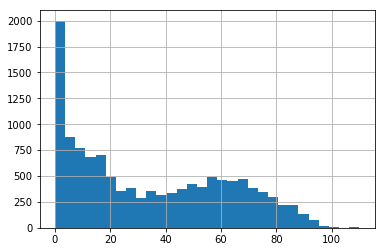

In [14]:
subj['patient_age_years'] = subj.patient_age_days/365.25
subj.patient_age_years.hist(bins=30, range=[0,110]);

So we can see that we have a modes in our population around infancy and then a broad mode centered around the early 60s.

## Finally lets look at the numbers in different categories

In [9]:
males = subj[subj['gender'] == 'Male']
females = subj[subj['gender'] == 'Female']
num_males = males['patientcode'].count()
num_females = females['patientcode'].count()
print("number of males: %s" % num_males)
print("number of females: %s" % num_females)

number of males: 6193
number of females: 5970


In [10]:
age_18 = 18 * 365.25 # number of days in 18 years

## traditional definitions of age categories

neonates = subj[subj.patient_age_days <= 30]
children = subj[subj.patient_age_days < age_18]
adults = subj[subj.patient_age_days >= age_18]

In [11]:
neonates.count()

patient_name         375
gender               371
patient_age_days     375
patientcode          375
patient_age_years    375
dtype: int64

In [12]:
children.count()

patient_name         4994
gender               4920
patient_age_days     4994
patientcode          4994
patient_age_years    4994
dtype: int64

In [13]:
adults.count()

patient_name         7391
gender               7243
patient_age_days     7391
patientcode          7391
patient_age_years    7391
dtype: int64